In [8]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import mean_squared_error

In [2]:
X_train = pd.read_csv("hw11t4v0_train.txt", sep="\t", header=None)
print X_train.shape
X_train.head()

(500, 10)


,0,1,2,3,4,5,6,7,8,9
0,3.207,0.966,-0.047,-0.124,-0.283,0.409,-1.882,-3.760,-7.582,4.655
1,-0.110,0.063,0.082,0.127,-0.463,-0.253,-3.869,1.167,1.980,0.466
2,3.671,-1.043,-1.647,1.070,-0.075,-0.255,-0.952,-4.132,-2.808,1.147
3,0.191,-1.138,1.178,0.303,-0.969,-0.123,3.220,1.246,0.807,-0.068
4,3.141,1.167,0.250,-0.368,-0.735,0.389,-0.325,-2.166,-2.377,-0.970


In [3]:
X_test = pd.read_csv("hw11t4v0_test.txt", sep="\t", header=None)
print X_test.shape
X_test.head()

(50, 10)


,0,1,2,3,4,5,6,7,8,9
0,0.806,-1.351,-0.086,-1.825,0.388,-0.407,3.451,-0.930,-1.653,0.510
1,3.776,2.515,0.003,0.484,0.608,0.603,0.365,-5.601,-6.973,0.422
2,1.745,3.112,0.015,0.049,0.253,0.189,3.222,-2.712,-1.468,-4.192
3,2.484,1.496,-1.907,0.209,0.022,0.395,-0.610,-1.474,-4.673,1.910
4,2.102,1.392,0.001,-0.055,-0.234,0.229,-2.110,-4.099,-2.209,-1.835


In [4]:
y_train = pd.read_csv("hw11t4v0_target.txt", sep="\t", header=None)
y_test = pd.read_csv("hw11t4v0_target_test.txt", sep="\t", header=None)

Изобразим проекции обучающей выборки на 1,2 и 3-х мерные пространства.

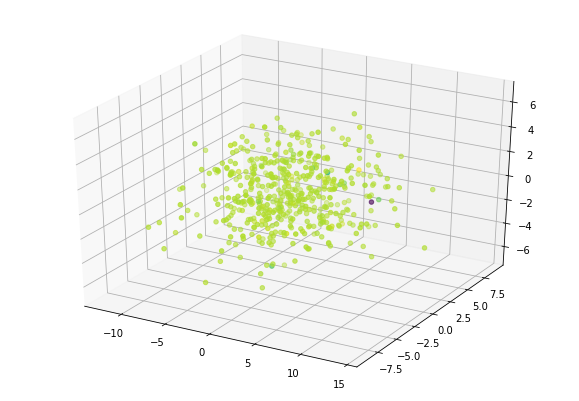

In [5]:
pca = PCA(n_components=3)
X_train_transformed = pca.fit_transform(X_train)

plt.close()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_transformed[:,0], X_train_transformed[:,1], X_train_transformed[:,2], c=y_train)
plt.show()

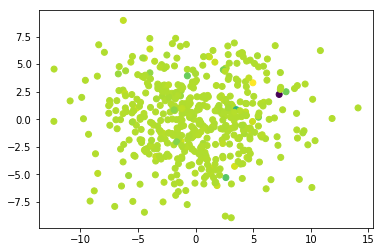

In [6]:
pca = PCA(n_components=2)
X_train_transformed = pca.fit_transform(X_train)
plt.scatter(X_train_transformed[:,0], X_train_transformed[:,1], c=y_train)
plt.show()

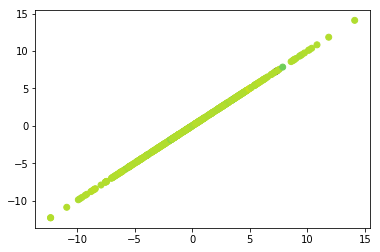

In [7]:
pca = PCA(n_components=1)
X_train_transformed = pca.fit_transform(X_train)
plt.scatter(X_train_transformed, X_train_transformed, c=y_train)
plt.show()

Видно, что линейным преобразованием признаков не получается выделить кластеры. Попробуем нелинейные преобразования.

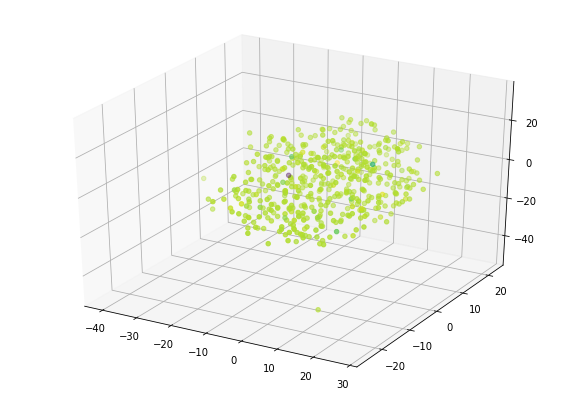

In [9]:
tsne = TSNE(n_components=3)
X_train_transformed = tsne.fit_transform(X_train)

plt.close()
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X_train_transformed[:,0], X_train_transformed[:,1], X_train_transformed[:,2], c=y_train)
plt.show()

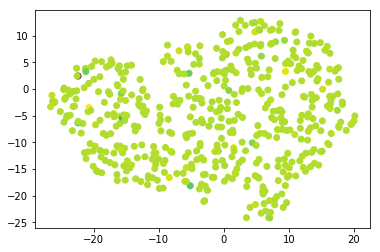

In [10]:
tsne = TSNE(n_components=2)
X_train_transformed = tsne.fit_transform(X_train)
plt.scatter(X_train_transformed[:,0], X_train_transformed[:,1], c=y_train)
plt.show()

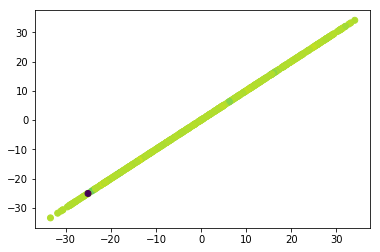

In [11]:
tsne = TSNE(n_components=1)
X_train_transformed = tsne.fit_transform(X_train)
plt.scatter(X_train_transformed, X_train_transformed, c=y_train)
plt.show()

Снова не видно кластеров.

Протестируем модель, обученную на исходной выборке.

In [12]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_predicted = regressor.predict(X_test)
print mean_squared_error(y_test, y_predicted)

22102138.8135


Протестируем модель, обученную на исходной выборке, подверженной уменьшению размерности при помощи PCA.

In [41]:
pca = PCA(n_components=2)
pca.fit(X_train)
regressor = LinearRegression()
regressor.fit(pca.transform(X_train), y_train)
y_predicted = regressor.predict(pca.transform(X_test))
print mean_squared_error(y_test, y_predicted)

21884276.8955


Чуть лучше.

Протестируем модель, обученную на исходной выборке, подверженной уменьшению размерности при помощи нелинейного преобразования TSNE.

In [43]:
tsne = TSNE(n_components=2)
X_transformed = tsne.fit_transform(np.vstack((X_train, X_test)))
regressor = LinearRegression()
regressor.fit(X_transformed[:X_train.shape[0]], y_train)
y_predicted = regressor.predict(X_transformed[X_train.shape[0]:])
print mean_squared_error(y_test, y_predicted)

21844117.1966


Почти тоже самое.

Линейная модель работает плохо. Попробуем SVM с RBF ядром.

In [53]:
from sklearn.svm import SVR

In [54]:
regressor = SVR()
regressor.fit(X_train, y_train)
y_predicted = regressor.predict(X_test)
print mean_squared_error(y_test, y_predicted)

21848953.1724


Никакого улучшения. Можно предположить, что данные имеют слабую зависимость с метками, что можно наблюдать и при визуализации, проделанной выше.